# Lab 2
#### Introduction to Computer Vision, prof. Cho

## Problem 1: Simple Image Processing

In [1]:
import cv2 as cv
import sys
import matplotlib.pyplot as plt
import numpy as np

bus = cv.imread('bus.jpg')
bus_rgb = cv.cvtColor(bus, cv.COLOR_BGR2RGB)        # To plot using matplotlib

if bus is None:
    sys.exit('File not found')

print('Image Size =', bus.shape)        # (height, width, channel)

Image Size = (427, 640, 3)


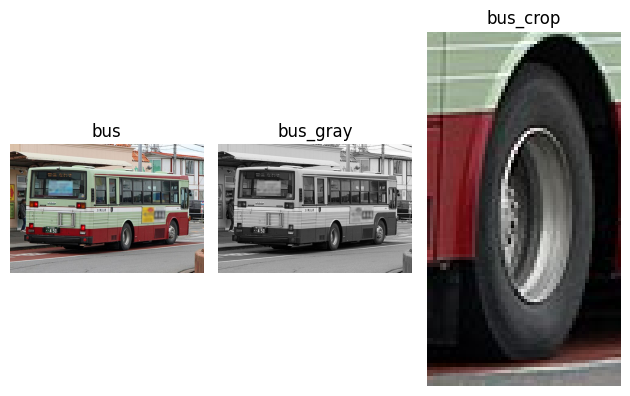

In [2]:
bus_gray = cv.cvtColor(bus, cv.COLOR_BGR2GRAY)
cv.imwrite('bus_gray.jpg', bus_gray)

bus_crop = bus[250:360, 350:410]
bus_crop_rgb = cv.cvtColor(bus_crop, cv.COLOR_BGR2RGB)      # To plot using matplotlib

plt.subplot(1,3,1)
plt.imshow(bus_rgb)
plt.title('bus')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(bus_gray, cmap='gray')
plt.title('bus_gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(bus_crop_rgb)
plt.title('bus_crop')
plt.axis('off')

plt.tight_layout()
plt.show()

## Problem 2: Image Smoothing

### 2D Convolution (Image Filtering)

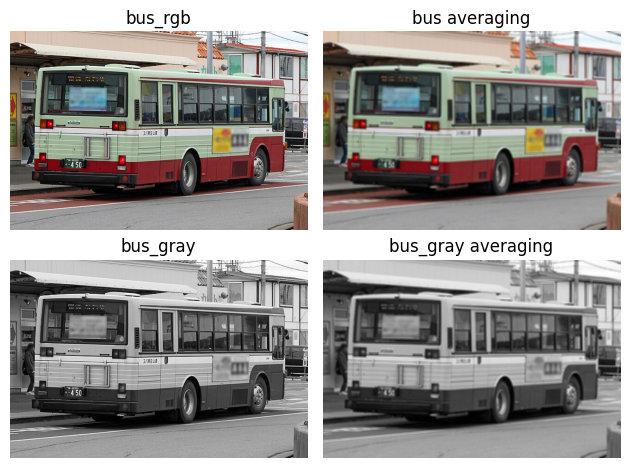

In [3]:
kernel = np.ones((5,5), np.float32) / 25        # mean filter
average = cv.filter2D(bus, -1, kernel)
average = cv.cvtColor(average, cv.COLOR_BGR2RGB)        # to plot using matplotlib
average_gray = cv.filter2D(bus_gray, -1, kernel)

plt.subplot(2,2,1)
plt.imshow(bus_rgb)
plt.title('bus_rgb')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(average)
plt.title('bus averaging')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(bus_gray, cmap='gray')
plt.title('bus_gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(average_gray, cmap='gray')
plt.title('bus_gray averaging')
plt.axis('off')

plt.tight_layout()
plt.show()

### Gaussian Blurring

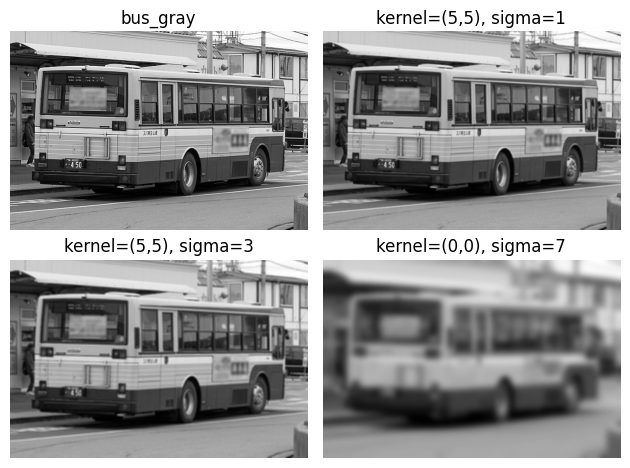

In [4]:
gau1 = cv.GaussianBlur(bus_gray, (5,5), 1)
gau2 = cv.GaussianBlur(bus_gray, (5,5), 3)
gau3 = cv.GaussianBlur(bus_gray, (0,0), 7)      # kernel size is dependent on sigma

gau_list = [bus_gray, gau1, gau2, gau3]
gau_titles = ['bus_gray', 'kernel=(5,5), sigma=1', 'kernel=(5,5), sigma=3', 'kernel=(0,0), sigma=7']

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(gau_list[i], cmap='gray')
    plt.title(gau_titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

## Problem 3: Image Gradients

### Sobel

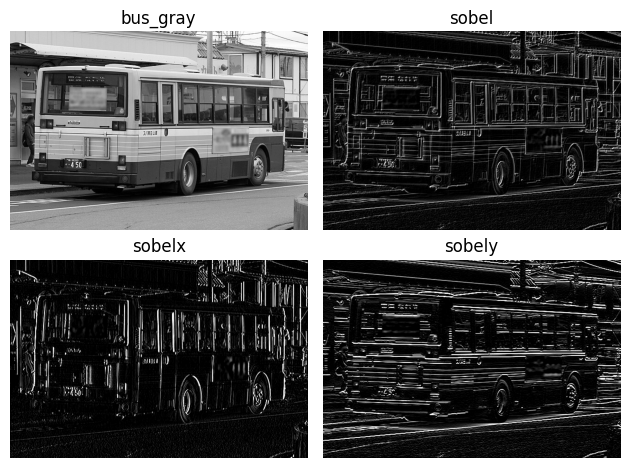

In [5]:
sobelx = cv.Sobel(bus_gray, -1, 1, 0, 3)        # input should be gray scale image
sobely = cv.Sobel(bus_gray, -1, 0, 1, 3)

abs_grad_x = cv.convertScaleAbs(sobelx)
abs_grad_y = cv.convertScaleAbs(sobely)
sobel = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

sobel_list = [bus_gray, sobel, sobelx, sobely]
sobel_titles = ['bus_gray', 'sobel', 'sobelx', 'sobely']

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(sobel_list[i], cmap='gray')
    plt.title(sobel_titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

### Canny

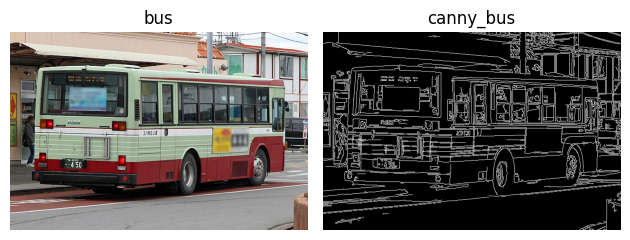

In [6]:
threshold1, threshold2 = 0, 450

canny_bus = cv.Canny(bus, threshold1, threshold2)
canny_bus_rgb = cv.cvtColor(canny_bus, cv.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(bus_rgb)
plt.title('bus')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(canny_bus_rgb)
plt.title('canny_bus')
plt.axis('off')

plt.tight_layout()
plt.show()

### Laplacian Filter

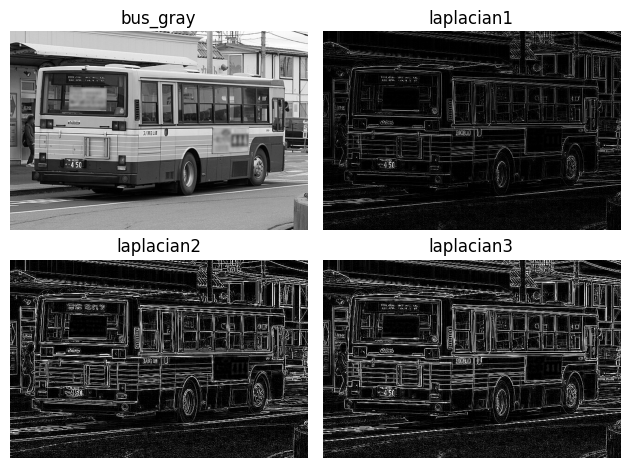

In [7]:
laplacian = cv.Laplacian(bus_gray, cv.CV_8U, ksize=3)       # 8U means 8-bit unsigned

mask1 = np.array([[0, -1, 0],
                  [-1, 4, -1],
                  [0, -1, 0]])
mask2 = np.array([[1, 1, 1],
                  [1, -8, 1],
                  [1, 1, 1]])
mask3 = np.array([[-1, -1, -1],
                  [-1, 8, -1],
                  [-1, -1, -1]])

laplacian1 = cv.filter2D(bus_gray, -1, mask1)
laplacian2 = cv.filter2D(bus_gray, -1, mask2)
laplacian3 = cv.filter2D(bus_gray, -1, mask3)

laplacian_list = [bus_gray, laplacian1, laplacian2, laplacian3]
laplacian_titles = ['bus_gray', 'laplacian1', 'laplacian2', 'laplacian3']

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(laplacian_list[i], cmap='gray')
    plt.title(laplacian_titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

## Problem 4

### Image Pyramid

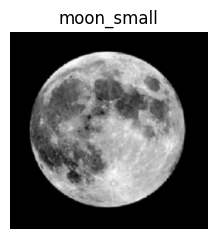

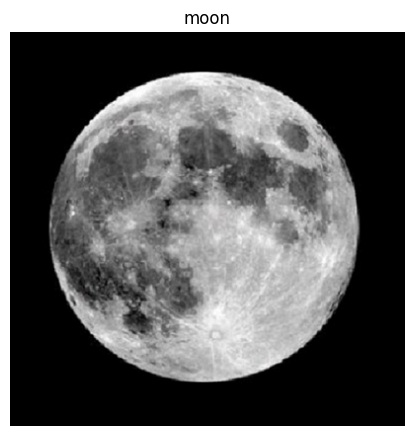

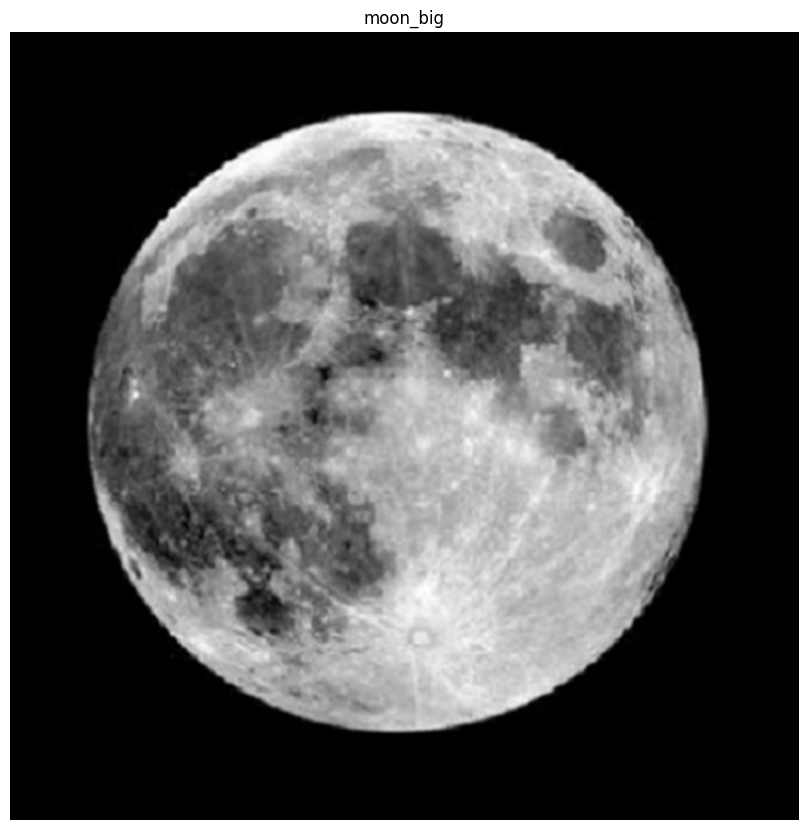

In [8]:
moon = cv.imread('moon.jpg')
moon_h, moon_w, _ = moon.shape

moon_small = cv.pyrDown(moon)
moon_big = cv.pyrUp(moon)

moon_small_h, moon_small_w, _ = moon_small.shape
moon_big_h, moon_big_w, _ = moon_big.shape

plt.figure(figsize=(moon_small_w / 100, moon_small_h / 100))
plt.imshow(cv.cvtColor(moon_small, cv.COLOR_BGR2RGB))
plt.title('moon_small')
plt.axis('off')

plt.figure(figsize=(moon_w / 100, moon_h / 100))
plt.imshow(cv.cvtColor(moon, cv.COLOR_BGR2RGB))
plt.title('moon')
plt.axis('off')

plt.figure(figsize=(moon_big_w / 100, moon_big_h / 100))
plt.imshow(cv.cvtColor(moon_big, cv.COLOR_BGR2RGB))
plt.title('moon_big')
plt.axis('off')

plt.show()

### Image Blending

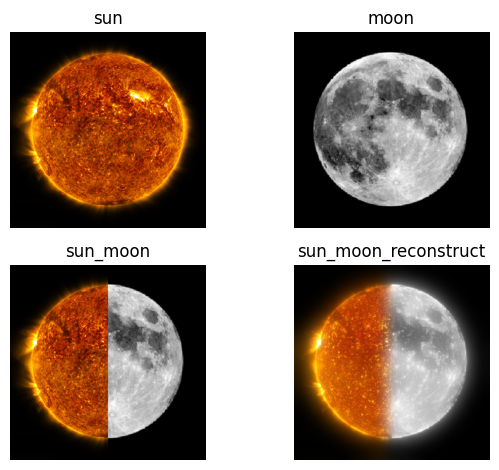

In [9]:
sun = cv.imread('sun.png')      # sun(512, 512, 3), moon(512, 512, 3)
sun_moon = np.hstack((sun[:, :256], moon[:, 256:]))

# Generate Gaussian pyramid for sun
sun_copy = sun.copy()
gp_sun = [sun_copy]
for i in range(6):
    sun_copy = cv.pyrDown(sun_copy)
    gp_sun.append(sun_copy)

# Generate Gaussian pyramid for moon
moon_copy = moon.copy()
gp_moon = [moon_copy]
for i in range(6):
    moon_copy = cv.pyrDown(moon_copy)
    gp_moon.append(moon_copy)

# Generate Laplacian pyramid for sun
sun_copy = gp_sun[5]
lp_sun = [sun_copy]
for i in range(5, 0, -1):
    gaussian_expanded = cv.pyrUp(gp_sun[i])
    laplacian = cv.subtract(gp_sun[i-1], gaussian_expanded)
    lp_sun.append(laplacian)

# Generate Laplacian pyramid for moon
moon_copy = gp_moon[5]
lp_moon = [moon_copy]
for i in range(5, 0, -1):
    gaussian_expanded = cv.pyrUp(gp_moon[i])
    laplacian = cv.subtract(gp_moon[i-1], gaussian_expanded)
    lp_moon.append(laplacian)

# Add left and right halves of images in each level
sun_moon_pyramid = []
n = 0
for sun_lap, moon_lap in zip(lp_sun, lp_moon):
    n += 1
    rows, cols, ch = sun_lap.shape
    laplacian = np.hstack((sun_lap[:, 0:int(cols/2)], moon_lap[:, int(cols/2):]))
    sun_moon_pyramid.append(laplacian)

# New construct
sun_moon_reconstruct = sun_moon_pyramid[0]
for i in range(1, 6):
    sun_moon_reconstruct = cv.pyrUp(sun_moon_reconstruct)
    sun_moon_reconstruct = cv.add(sun_moon_pyramid[i], sun_moon_reconstruct)

blending_list = [sun, moon, sun_moon, sun_moon_reconstruct]
blending_titles = ['sun', 'moon', 'sun_moon', 'sun_moon_reconstruct']

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(cv.cvtColor(blending_list[i], cv.COLOR_BGR2RGB))
    plt.title(blending_titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()